In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sts
import seaborn as sns

In [20]:
df=pd.read_csv("02 Bhagirathi Catchment.csv")

In [21]:
df.head()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,OCT,NOV,DEC,ANN,Unnamed: 15,Decadal average temerature change,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,T2M_MIN,1981,-5.71,-4.19,0.37,3.34,9.73,10.55,14.69,13.72,...,4.68,-1.53,-1.31,-5.71,4.504167,MINI TEMPERATURE DECRESING,NaN,NaN,NaN,NaN
1,T2M_MIN,1982,-4.49,-4.84,-4.49,3.88,5.69,10.01,14.12,13.65,...,4.71,1.87,-2.50,-4.84,3.743333,NaN,NaN,NaN,NaN,NaN
2,T2M_MIN,1983,-4.95,-4.13,-0.65,3.50,7.35,10.62,12.18,14.56,...,4.94,3.15,-2.21,-4.95,4.610833,4.601583333,NaN,NaN,NaN,NaN
3,T2M_MIN,1984,-4.86,-6.61,1.58,4.74,7.58,13.51,13.25,13.73,...,3.46,1.54,-2.62,-6.61,4.526667,4.82825,NaN,NaN,NaN,NaN
4,T2M_MIN,1985,-3.88,-3.30,1.42,6.03,8.62,12.07,14.51,13.20,...,6.53,-0.02,-3.42,-3.88,5.215833,5.164166667,NaN,NaN,NaN,NaN


In [22]:
df=df.dropna(axis=1)

In [23]:
df.head()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN,Unnamed: 15
0,T2M_MIN,1981,-5.71,-4.19,0.37,3.34,9.73,10.55,14.69,13.72,9.71,4.68,-1.53,-1.31,-5.71,4.504167
1,T2M_MIN,1982,-4.49,-4.84,-4.49,3.88,5.69,10.01,14.12,13.65,7.31,4.71,1.87,-2.50,-4.84,3.743333
2,T2M_MIN,1983,-4.95,-4.13,-0.65,3.50,7.35,10.62,12.18,14.56,10.97,4.94,3.15,-2.21,-4.95,4.610833
3,T2M_MIN,1984,-4.86,-6.61,1.58,4.74,7.58,13.51,13.25,13.73,9.02,3.46,1.54,-2.62,-6.61,4.526667
4,T2M_MIN,1985,-3.88,-3.30,1.42,6.03,8.62,12.07,14.51,13.20,10.83,6.53,-0.02,-3.42,-3.88,5.215833


In [24]:
df=df.drop(columns=["PARAMETER","JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","Unnamed: 15"])

In [25]:
df["YEAR"] = pd.to_datetime(df["YEAR"], format="%Y")
df.set_index("YEAR", inplace=True)

df.head()

,ANN
YEAR,
1981-01-01,-5.71
1982-01-01,-4.84
1983-01-01,-4.95
1984-01-01,-6.61
1985-01-01,-3.88


In [26]:
# df.set_index(df["YEAR"],inplace=True)

In [27]:
df.head()

,ANN
YEAR,
1981-01-01,-5.71
1982-01-01,-4.84
1983-01-01,-4.95
1984-01-01,-6.61
1985-01-01,-3.88


In [28]:
# df=df.drop(columns=["YEAR"])

In [29]:
df.head()


,ANN
YEAR,
1981-01-01,-5.71
1982-01-01,-4.84
1983-01-01,-4.95
1984-01-01,-6.61
1985-01-01,-3.88


<Axes: xlabel='YEAR'>

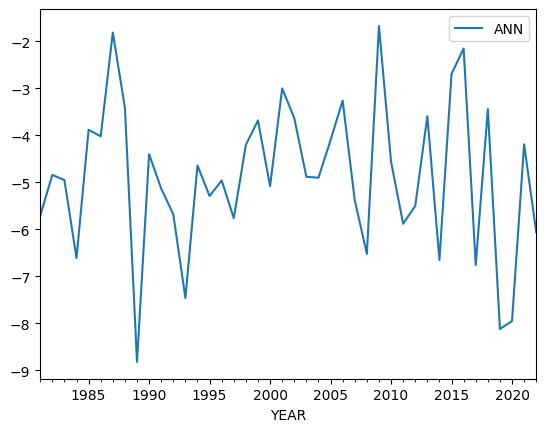

In [30]:
df.plot()

In [31]:
from statsmodels.tsa.stattools import adfuller
def adtest(dataset):
    result=adfuller(dataset)
    print("pval",result[1])

In [32]:
adtest(df["ANN"])

pval 5.525567374666459e-09


In [33]:
df["SFORCAST"]=df["ANN"]-df["ANN"]-df["ANN"].shift(12)

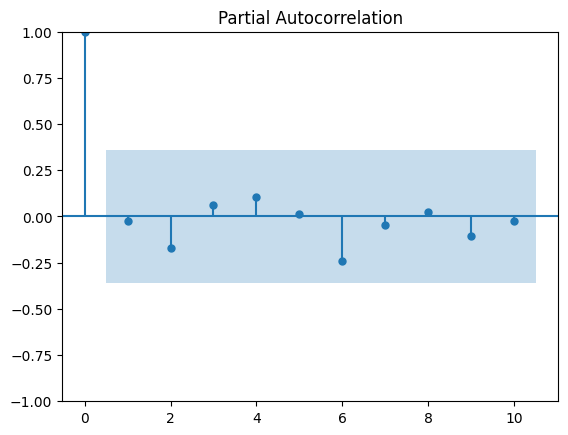

In [34]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig=plot_pacf(df["SFORCAST"].dropna(),lags=10)

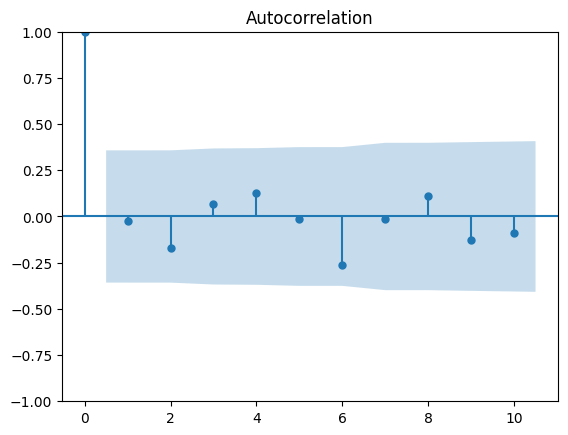

In [35]:
fig=plot_acf(df["SFORCAST"].dropna(),lags=10)

In [36]:
model=sts.tsa.statespace.SARIMAX(df["SFORCAST"],order=(1,1,1),seasonal_order=(1,1,1,12))
result=model.fit()

C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations 

<Axes: xlabel='YEAR'>

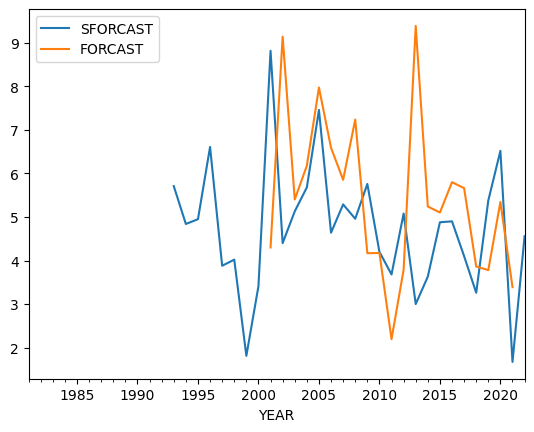

In [37]:
df["FORCAST"]=result.predict(start=20,end=40)
df[["SFORCAST","FORCAST"]].plot()

In [38]:
df.head()

,ANN,SFORCAST,FORCAST
YEAR,,,
1981-01-01,-5.71,NaN,NaN
1982-01-01,-4.84,NaN,NaN
1983-01-01,-4.95,NaN,NaN
1984-01-01,-6.61,NaN,NaN
1985-01-01,-3.88,NaN,NaN


In [39]:
df.tail()

,ANN,SFORCAST,FORCAST
YEAR,,,
2018-01-01,-3.44,3.26,3.862633
2019-01-01,-8.12,5.38,3.780029
2020-01-01,-7.95,6.52,5.346694
2021-01-01,-4.19,1.67,3.387664
2022-01-01,-6.06,4.56,NaN
